In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
image_paths = ["RobertMixed03.jpg", "smallstrelitzia.jpg", "smallsunset.jpg"]

In [3]:
def load_images():
    image_array = []
    try:
        for image_path in image_paths:
            img = Image.open(image_path)
            image_array.append(img)
    except IOError: 
        pass
    return image_array

In [4]:
images = load_images()

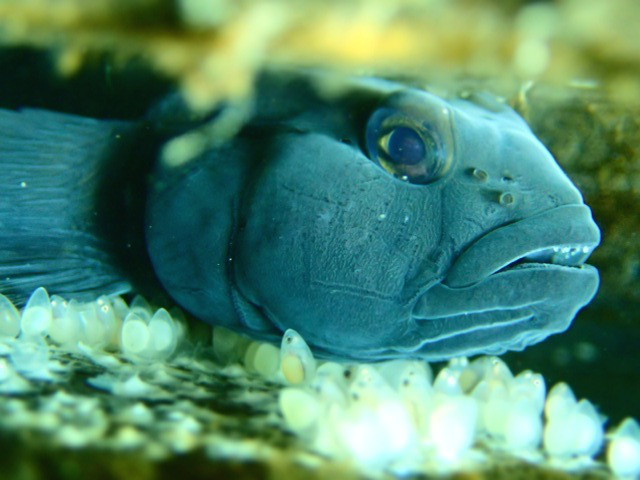

In [5]:
images[0]

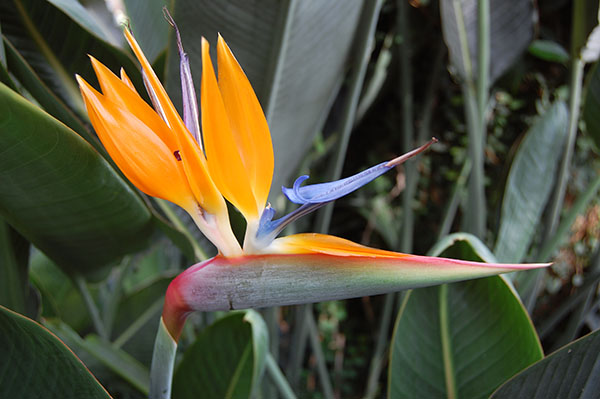

In [6]:
images[1]

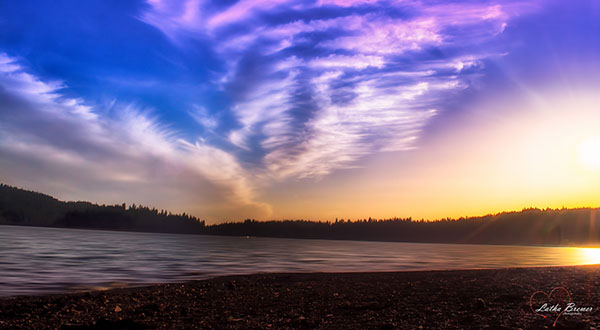

In [20]:
images[2]

In [8]:
#working_image = images[np.random.randint(3)]
# ^ Use the a

working_image = images[0]

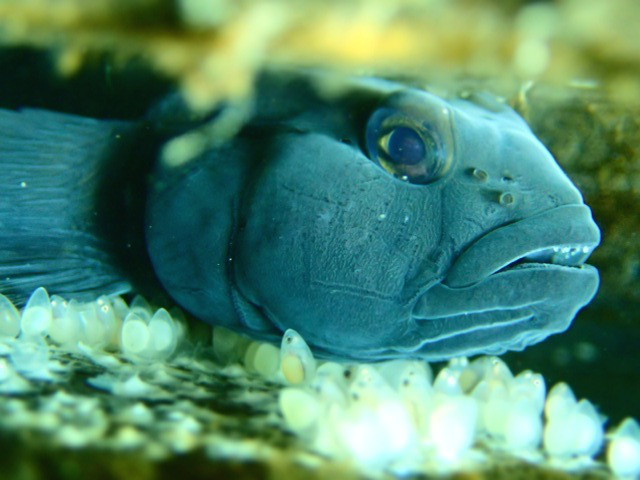

In [50]:
working_image

In [ ]:
## Write your code to create the data here

In [14]:
k=20 #number of clusters
cols=3 # R,G,B
rows=100 #number of datapoints

In [15]:
#initialize a weight vector with size k
weights = [0 for wt in range(k)]
#2D array containing the mean values with size k x cols. each row contains the mean value for each Gaussian
mean = [[0 for m1 in range(cols-1)] for m2 in range(k)]
#3D array to store the values for covariance matrix with size k x cols x cols
covariance = [[[0 for c1 in range(cols-1)] for c2 in range(cols-1)] for c3 in range(k)]
p_values = [[0 for p1 in range(k)] for p2 in range(rows)]
for i in range(np.shape(p_values)[0]):
    ind=np.random.randint(0, k)
    p_values[i][ind]=1
p_df=pd.DataFrame(p_values)

In [17]:
def w(p_df):
    p_sum_k=[]
    for i in range(k):
        p_sum_k.append(sum(p_df.iloc[:][i].values))
    return p_sum_k/sum(p_sum_k)

In [18]:
def u(p_df):
    p_sum_k=[]
    mean_num=np.matmul(p_df.values.T,x)
    for i in range(k):
        p_sum_k.append(sum(p_df.iloc[:][i].values))
        mean_num[i]=mean_num[i]/p_sum_k[i]
    return mean_num

In [19]:
def sig(mean,p_df):
    p_sum_k=[]
    k_temp=[]
    for i in range(k):
        p_sum_k.append(sum(p_df.iloc[:][i].values))
        r_temp=[]
        for r in range(cols-1):
            c_temp=[]
            for c in range(cols-1):
                check=0
                for j in range(rows):
                    f_part=x.iloc[j][r]-mean[i][r]
                    s_part=x.iloc[j][c]-mean[i][c]
                    check=check+(p_df.iloc[j][i]*f_part*s_part)
                check=check/p_sum_k[i]
                if r==c:
                    if abs(check)<0.0001:
                        check=0.0001
                c_temp.append(check)
            r_temp.append(c_temp)
        k_temp.append(r_temp)
    return k_temp

In [20]:
def M_step(p_df):
    w=w(p_df)
    m=u(p_df)
    c=sig(m,p_df)
    return w,m,c

In [21]:
def Gaussian(x,u,sig):
    x_u=x-u
    sig_inv=np.linalg.inv(sig)
    in_exp=np.exp(-1*0.5*np.matmul(np.matmul(x_u,sig_inv),x_u.T))
    a=np.power(2*np.pi,cols-1)*np.linalg.det(sig)
    out_exp=1/np.sqrt(a)
    return in_exp*out_exp

In [22]:
def E(w,m,c,p):
    x1=[]
    for j in range(rows):
        p_x=0.0
        for i in range(k):
            p_x=p_x+Gaussian(x.iloc[j],m[i],c[i])*w[i]
        x_temp=[]
        for i in range(k):
            x3=P_of_xj(w,m,c,j,i)/p_x
            x_temp.append(x3)
        x1.append(x_temp)
    return pd.DataFrame(x1)
